In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

atuona pf
ishigaki jp
ushuaia ar
pocoes br
bethel us
okandja ga
kaitangata nz
cape town za
invermere ca
namatanai pg
murmashi ru
albany au
rikitea pf
nanortalik gl
jamestown sh
bredasdorp za
portland au
tuktoyaktuk ca
grindavik is
weyburn ca
narsaq gl
tura ru
katsuura jp
chokurdakh ru
puerto madryn ar
umzimvubu za
qaanaaq gl
kawanoe jp
chapais ca
muisne ec
hithadhoo mv
barentsburg sj
takanabe jp
malwan in
ribeira brava pt
saint george bm
korla cn
qianjiang cn
ullapool gb
attawapiskat ca
qaanaaq gl
butaritari ki
belushya guba ru
tasiilaq gl
egvekinot ru
brewster us
odoyev ru
bengkulu id
amga ru
madimba tz
marcona pe
kahului us
bredasdorp za
kieta pg
fortuna us
vardo no
mys shmidta ru
klaksvik fo
wanning cn
wangaratta au
upernavik gl
kavaratti in
makung tw
amderma ru
ginda er
la ronge ca
barrow us
turayf sa
mar del plata ar
buritizeiro br
punta arenas cl
nizhneyansk ru
mar del plata ar
punta arenas cl
bakel sn
chokurdakh ru
ushuaia ar
sao joao da barra br
qaanaaq gl
kapaa us
arraial do c

ayagoz kz
cape town za
gorkovskiy ru
jumla np
tuktoyaktuk ca
longyearbyen sj
albany au
ushuaia ar
flinders au
albany au
olafsvik is
sitka us
mar del plata ar
samusu ws
louisbourg ca
port alfred za
cururupu br
howard springs au
sisimiut gl
amazar ru
fairbanks us
barrow us
attawapiskat ca
shimoda jp
pevek ru
stokmarknes no
albany au
mount gambier au
rikitea pf
nikolskoye ru
ushuaia ar
jamestown sh
atuona pf
taltal cl
ushuaia ar
curug rs
punta arenas cl
albany au
yellowknife ca
vanimo pg
butaritari ki
ushuaia ar
busselton au
taolanaro mg
ushuaia ar
port macquarie au
anloga gh
araxa br
kapaa us
caravelas br
busselton au
ostrovnoy ru
kahului us
barentsburg sj
dombarovskiy ru
bredasdorp za
chapais ca
lasa cn
hobart au
leo bf
mataura pf
mys shmidta ru
hithadhoo mv
kapaa us
bluff nz
bluff nz
bengkulu id
carnarvon au
kapaa us
bredasdorp za
sentyabrskiy ru
hithadhoo mv
nara ml
port-gentil ga
liverpool ca
atuona pf
severo-kurilsk ru
vaini to
albany au
boguchany ru
maxixe mz
nanning cn
cairns au
b

laguna br
poum nc
uruzgan af
mys shmidta ru
tautira pf
mataura pf
kamyzyak ru
sakakah sa
alghero it
fort nelson ca
kapaa us
mahebourg mu
ushuaia ar
hilo us
nizhneyansk ru
leningradskiy ru
mae hong son th
komsomolskiy ru
manakara mg
avarua ck


In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

598

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime



In [10]:
# Run an API request for each of the cities.
# Create an empty list to hold the weather data.

city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | atuona
Processing Record 2 of Set 1 | ishigaki
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | pocoes
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | okandja
City not found. Skipping...
Processing Record 7 of Set 1 | kaitangata
Processing Record 8 of Set 1 | cape town
Processing Record 9 of Set 1 | invermere
Processing Record 10 of Set 1 | namatanai
Processing Record 11 of Set 1 | murmashi
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | nanortalik
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | portland
Processing Record 18 of Set 1 | tuktoyaktuk
Processing Record 19 of Set 1 | grindavik
Processing Record 20 of Set 1 | weyburn
Processing Record 21 of Set 1 | narsaq
Processing Record 22 of Set 1 | tura
Processing Record 23 of

Processing Record 38 of Set 4 | sorrento
Processing Record 39 of Set 4 | yeletskiy
City not found. Skipping...
Processing Record 40 of Set 4 | adjumani
Processing Record 41 of Set 4 | louis trichardt
Processing Record 42 of Set 4 | pailitas
Processing Record 43 of Set 4 | kulhudhuffushi
Processing Record 44 of Set 4 | chuy
Processing Record 45 of Set 4 | acapulco
Processing Record 46 of Set 4 | mount gambier
Processing Record 47 of Set 4 | inuvik
Processing Record 48 of Set 4 | chumikan
Processing Record 49 of Set 4 | manzanillo
Processing Record 50 of Set 4 | goderich
Processing Record 1 of Set 5 | calama
Processing Record 2 of Set 5 | sinnamary
Processing Record 3 of Set 5 | ostersund
Processing Record 4 of Set 5 | deputatskiy
Processing Record 5 of Set 5 | luderitz
Processing Record 6 of Set 5 | novyy urengoy
Processing Record 7 of Set 5 | kisangani
Processing Record 8 of Set 5 | illoqqortoormiut
City not found. Skipping...
Processing Record 9 of Set 5 | provideniya
Processing Recor

Processing Record 30 of Set 8 | amazar
Processing Record 31 of Set 8 | shimoda
Processing Record 32 of Set 8 | pevek
Processing Record 33 of Set 8 | stokmarknes
Processing Record 34 of Set 8 | curug
Processing Record 35 of Set 8 | anloga
Processing Record 36 of Set 8 | araxa
Processing Record 37 of Set 8 | caravelas
Processing Record 38 of Set 8 | ostrovnoy
Processing Record 39 of Set 8 | dombarovskiy
Processing Record 40 of Set 8 | lasa
Processing Record 41 of Set 8 | leo
Processing Record 42 of Set 8 | port-gentil
Processing Record 43 of Set 8 | liverpool
Processing Record 44 of Set 8 | boguchany
Processing Record 45 of Set 8 | maxixe
Processing Record 46 of Set 8 | nanning
Processing Record 47 of Set 8 | cairns
Processing Record 48 of Set 8 | vao
Processing Record 49 of Set 8 | tilichiki
Processing Record 50 of Set 8 | dwarka
Processing Record 1 of Set 9 | agar
Processing Record 2 of Set 9 | ilka
City not found. Skipping...
Processing Record 3 of Set 9 | hervey bay
Processing Record

Processing Record 21 of Set 12 | ust-maya
Processing Record 22 of Set 12 | jabinyanah
Processing Record 23 of Set 12 | mandapeta
Processing Record 24 of Set 12 | petropavlivka
Processing Record 25 of Set 12 | tezu
Processing Record 26 of Set 12 | pisco
Processing Record 27 of Set 12 | erenhot
Processing Record 28 of Set 12 | vokhtoga
Processing Record 29 of Set 12 | cam pha
City not found. Skipping...
Processing Record 30 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 31 of Set 12 | comodoro rivadavia
Processing Record 32 of Set 12 | sungai besar
Processing Record 33 of Set 12 | ancud
Processing Record 34 of Set 12 | bud
Processing Record 35 of Set 12 | lerwick
Processing Record 36 of Set 12 | morbegno
Processing Record 37 of Set 12 | kununurra
Processing Record 38 of Set 12 | udachnyy
Processing Record 39 of Set 12 | champerico
Processing Record 40 of Set 12 | phan thiet
Processing Record 41 of Set 12 | riachao das neves
Processing Record 42 of Set 12 | poum
Process

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.8000,-139.0333,78.15,77,8,17.38,PF,2021-11-08 05:39:45
1,Ishigaki,24.3448,124.1572,69.93,88,75,18.41,JP,2021-11-08 05:39:45
2,Ushuaia,-54.8000,-68.3000,40.66,81,40,9.22,AR,2021-11-08 05:39:46
3,Pocoes,-14.5297,-40.3653,67.32,91,100,3.38,BR,2021-11-08 05:39:46
4,Bethel,41.3712,-73.4140,49.01,74,1,0.00,US,2021-11-08 05:39:46
5,Kaitangata,-46.2817,169.8464,62.92,78,95,5.48,NZ,2021-11-08 05:39:47
6,Cape Town,-33.9258,18.4232,64.11,68,20,4.00,ZA,2021-11-08 05:38:47
7,Invermere,50.5167,-116.0354,31.03,82,64,7.94,CA,2021-11-08 05:39:47
8,Namatanai,-3.6667,152.4333,85.03,63,84,12.03,PG,2021-11-08 05:39:47
9,Murmashi,68.8154,32.8115,21.61,93,0,2.24,RU,2021-11-08 05:39:48


In [12]:
new_column_order=["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [13]:
city_data_df=city_data_df[new_column_order]

In [14]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Atuona,PF,2021-11-08 05:39:45,-9.8000,-139.0333,78.15,77,8,17.38
1,Ishigaki,JP,2021-11-08 05:39:45,24.3448,124.1572,69.93,88,75,18.41
2,Ushuaia,AR,2021-11-08 05:39:46,-54.8000,-68.3000,40.66,81,40,9.22
3,Pocoes,BR,2021-11-08 05:39:46,-14.5297,-40.3653,67.32,91,100,3.38
4,Bethel,US,2021-11-08 05:39:46,41.3712,-73.4140,49.01,74,1,0.00
5,Kaitangata,NZ,2021-11-08 05:39:47,-46.2817,169.8464,62.92,78,95,5.48
6,Cape Town,ZA,2021-11-08 05:38:47,-33.9258,18.4232,64.11,68,20,4.00
7,Invermere,CA,2021-11-08 05:39:47,50.5167,-116.0354,31.03,82,64,7.94
8,Namatanai,PG,2021-11-08 05:39:47,-3.6667,152.4333,85.03,63,84,12.03
9,Murmashi,RU,2021-11-08 05:39:48,68.8154,32.8115,21.61,93,0,2.24


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

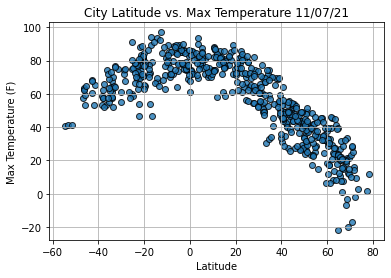

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

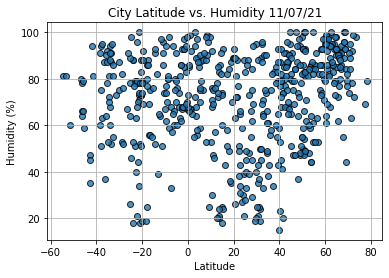

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

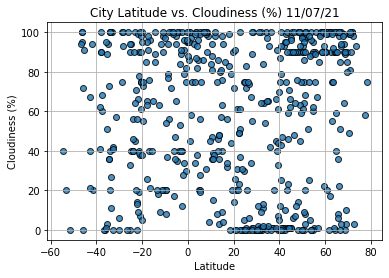

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

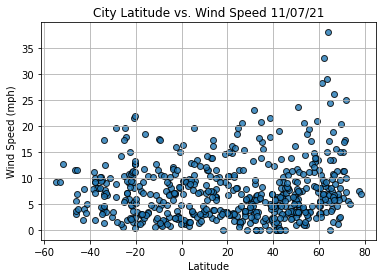

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

SyntaxError: unexpected EOF while parsing (<ipython-input-21-d58af2435033>, line 3)

In [22]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
index13 = city_data_df.loc[13]

In [24]:
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3      False
4       True
       ...  
550     True
551     True
552     True
553     True
554    False
Name: Lat, Length: 555, dtype: bool

In [25]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Ishigaki,JP,2021-11-08 05:39:45,24.3448,124.1572,69.93,88,75,18.41
4,Bethel,US,2021-11-08 05:39:46,41.3712,-73.4140,49.01,74,1,0.00
7,Invermere,CA,2021-11-08 05:39:47,50.5167,-116.0354,31.03,82,64,7.94
9,Murmashi,RU,2021-11-08 05:39:48,68.8154,32.8115,21.61,93,0,2.24
10,Albany,US,2021-11-08 05:38:54,42.6001,-73.9662,40.80,77,10,3.69
...,...,...,...,...,...,...,...,...,...
549,Uruzgan,AF,2021-11-08 05:53:23,32.8333,66.0000,59.25,33,2,2.71
550,Kamyzyak,RU,2021-11-08 05:53:23,46.1100,48.0736,46.38,75,90,8.95
551,Sakakah,SA,2021-11-08 05:53:23,29.9697,40.2064,60.37,25,0,4.36
552,Alghero,IT,2021-11-08 05:53:23,40.5589,8.3181,55.99,93,0,2.30


In [26]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Ishigaki,JP,2021-11-08 05:39:45,24.3448,124.1572,69.93,88,75,18.41
4,Bethel,US,2021-11-08 05:39:46,41.3712,-73.4140,49.01,74,1,0.00
7,Invermere,CA,2021-11-08 05:39:47,50.5167,-116.0354,31.03,82,64,7.94
9,Murmashi,RU,2021-11-08 05:39:48,68.8154,32.8115,21.61,93,0,2.24
10,Albany,US,2021-11-08 05:38:54,42.6001,-73.9662,40.80,77,10,3.69


In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

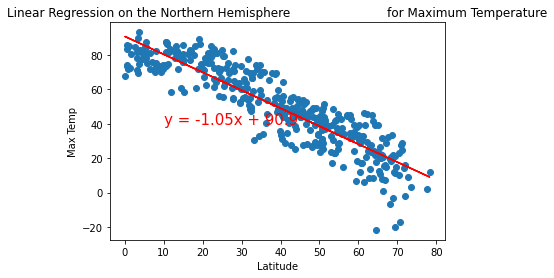

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for Maximum Temperature', 'Max Temp',(-50,90))

SyntaxError: EOL while scanning string literal (<ipython-input-29-8677a9d312d4>, line 6)

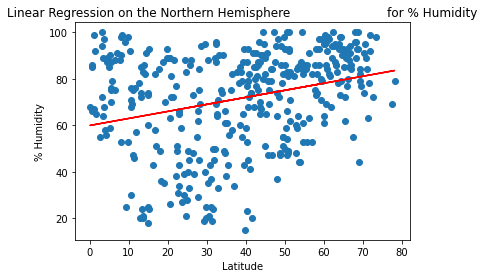

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for % Humidity', '% Humidity',(-50,15))

SyntaxError: EOL while scanning string literal (<ipython-input-31-9c3e8b244753>, line 6)

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n
                        for Wind Speed', 'Wind Speed',(40,35))

SyntaxError: EOL while scanning string literal (<ipython-input-32-7024af74f12d>, line 6)

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for Wind Speed', 'Wind Speed',(-50,35))

SyntaxError: EOL while scanning string literal (<ipython-input-33-8c4f0e57bb27>, line 6)